In [137]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string 
from nltk.corpus import stopwords 

#importing libraries for model building and evaluation 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

from sklearn.metrics import classification_report, confusion_matrix 
import tensorflow as tf 
from tensorflow.keras.regularizers import l2


In [111]:
data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
data.drop('article_link', axis='columns', inplace=True)

# Display the concatenated data 
print(data.head()) 

                                            headline  is_sarcastic
0  former versace store clerk sues over secret 'b...             0
1  the 'roseanne' revival catches up to our thorn...             0
2  mom starting to fear son's web series closest ...             1
3  boehner just wants wife to listen, not come up...             1
4  j.k. rowling wishes snape happy birthday in th...             0


In [112]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [113]:
data['is_sarcastic'].value_counts() # quite Balanced

is_sarcastic
0    14985
1    11724
Name: count, dtype: int64

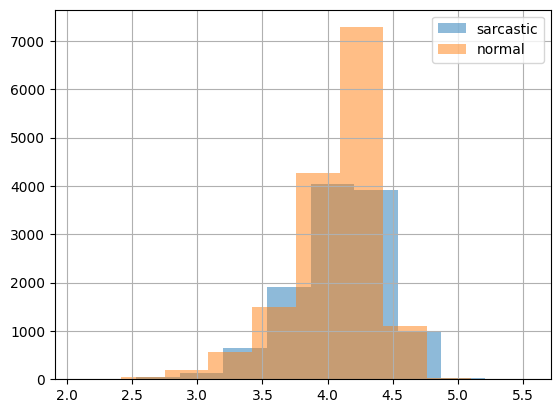

In [114]:
df_sarcasm = data.loc[data['is_sarcastic']==1, 'headline']
df_non_sarcasm = data.loc[data['is_sarcastic']==0, 'headline']

df_sarcasm.str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df_non_sarcasm.str.len().apply(np.log1p).hist(label='normal', alpha=.5)
plt.legend()

C:\Users\gab22\AppData\Local\Temp\ipykernel_14440\597986894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_sarcastic', data=data, palette="Set1").set_title(


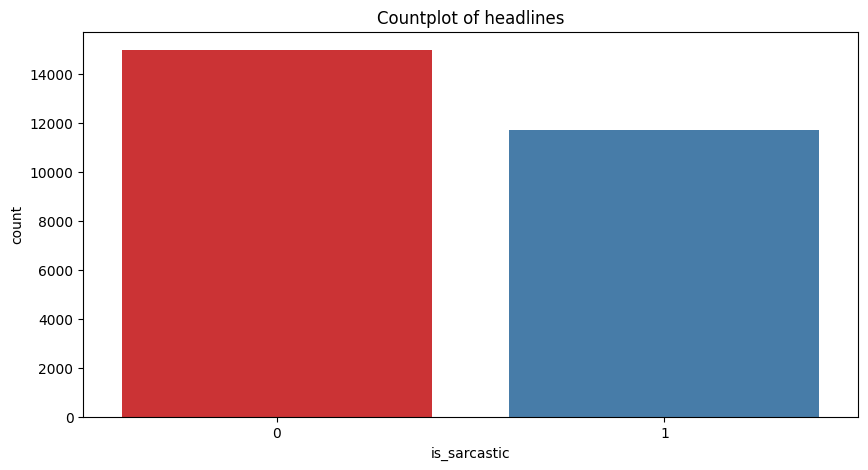

In [115]:
# Check the dataset label balance or not 
  
# Check number of headlines by is_sarcastics 
plt.figure(figsize=(10, 5)) 
sns.countplot(x='is_sarcastic', data=data, palette="Set1").set_title( 
    "Countplot of headlines") 
plt.show()

In [116]:
import nltk
nltk.download('stopwords') 
stopwords_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gab22\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
def clean_text(sentences): 
	text = sentences.lower() 
	text = re.sub('\[.*?\]', '', text) 
	text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
	text = re.sub('\w*\d\w*', '', text) 
	text = ' '.join([word for word in text.split() 
					if word not in stopwords_list]) 
	return text 


print(data['headline'].iloc[1]) 
clean_text(data['headline'].iloc[1]) 


the 'roseanne' revival catches up to our thorny political mood, for better and worse


<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\gab22\AppData\Local\Temp\ipykernel_14440\2073900725.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\gab22\AppData\Local\Temp\ipykernel_14440\2073900725.py:5: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


'roseanne revival catches thorny political mood better worse'

In [118]:
#new column to store cleaned text 
data['cleaned_headline']=data['headline'].map(clean_text)

In [119]:
#coverting the columns into lists 
text = data['cleaned_headline'].tolist() 
label = data['is_sarcastic'].tolist()

In [120]:
# train :test : validation = 70:20:10 
train_portion = .7

# Set the train size using training_portion arg 
train_size = int(len(text) * train_portion) 

# Training dataset 
train_text = text[:train_size] 
train_label = label[:train_size] 
# Validations dataset 
valid_size = train_size+int((len(text)-train_size)*2/3) 
val_text = text[train_size:valid_size] 
val_label = label[train_size:valid_size] 
# Testing dataset 
test_text = text[valid_size:] 
test_label = label[valid_size:] 

# Check 
print('Training data :', len(train_text), len(train_label)) 
print('Validations data :', len(val_text), len(val_label)) 
print('Testing data :', len(test_text), len(test_label)) 


Training data : 18696 18696
Validations data : 5342 5342
Testing data : 2671 2671


In [121]:
# Set parameters 
# Max len of unique words 
vocab_size = 100000

# Embedding dimension value 
embedding_dim = 200

# Max length of sentence 
max_length = 60

# pad_sequences arg 
padding_type = 'post'

# Unknow words = <OOV> 
oov_tok = '<OOV>'

# Tokenizing and padding 
# Create a tokenizer with a specified vocabulary size and out-of-vocabulary token 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 
# Fit the tokenizer on the training text data to create word-to-index mapping 
tokenizer.fit_on_texts(train_text) 


In [122]:
# Get the word index from the tokenizer 
word_index = tokenizer.word_index 

#Printing the word_index 
word_index

{'<OOV>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'us': 5,
 'one': 6,
 'report': 7,
 'area': 8,
 'donald': 9,
 'woman': 10,
 'says': 11,
 'day': 12,
 'time': 13,
 'first': 14,
 'like': 15,
 'get': 16,
 'trumps': 17,
 'people': 18,
 'obama': 19,
 'women': 20,
 'house': 21,
 'life': 22,
 'still': 23,
 'make': 24,
 'back': 25,
 'white': 26,
 'clinton': 27,
 'americans': 28,
 'world': 29,
 'could': 30,
 'family': 31,
 'black': 32,
 'years': 33,
 'way': 34,
 'study': 35,
 'gop': 36,
 'best': 37,
 'show': 38,
 'police': 39,
 'would': 40,
 'bill': 41,
 'president': 42,
 'watch': 43,
 'cant': 44,
 'know': 45,
 'really': 46,
 'good': 47,
 'death': 48,
 'things': 49,
 'going': 50,
 'love': 51,
 'school': 52,
 'hillary': 53,
 'finds': 54,
 'year': 55,
 'american': 56,
 'last': 57,
 'video': 58,
 'home': 59,
 'every': 60,
 'may': 61,
 'nation': 62,
 'need': 63,
 'say': 64,
 'state': 65,
 'take': 66,
 'little': 67,
 'parents': 68,
 'campaign': 69,
 'health': 70,
 'mom': 71,
 'kids': 72,
 'work': 73,

In [123]:
# Convert training text to sequences of word indices 
tokenizer.texts_to_sequences(train_text[:5])

[[223, 11574, 785, 3769, 2051, 261, 32, 1682, 2485, 8026],
 [8027, 2718, 2719, 11575, 240, 2720, 140, 786],
 [71, 708, 678, 825, 1907, 466, 5093, 124, 8028],
 [1079, 115, 311, 1307, 178, 2486, 11576, 747],
 [4316, 5094, 973, 8029, 484, 435, 1080, 34]]

In [124]:
# Tokenize and pad the training text data 
# Convert training text to sequences of word indices 
train_indices = tokenizer.texts_to_sequences(train_text) 
# Pad sequences to a fixed length 
train_padded = pad_sequences(train_indices, padding=padding_type, maxlen=max_length) 


In [125]:
# Convert validation text to sequences of word indices 
val_indices = tokenizer.texts_to_sequences(val_text) 
# Pad sequences to a fixed length 
validation_padded = pad_sequences(val_indices, padding=padding_type, maxlen=max_length) 

# Convert test text to sequences of word indices 
test_indices = tokenizer.texts_to_sequences(test_text) 
# Pad sequences to a fixed length 
test_padded = pad_sequences(test_indices, padding=padding_type, maxlen=max_length) 

# Check 
print('Training vector :', train_padded.shape) 
print('Validations vector :', validation_padded.shape) 
print('Testing vector :', test_padded.shape) 

Training vector : (18696, 60)
Validations vector : (5342, 60)
Testing vector : (2671, 60)


In [126]:
# Decode the sample training vector 
tokenizer.sequences_to_texts([train_padded[0].tolist()]) 


['former versace store clerk sues secret black code minority shoppers <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [127]:
# Prepare labels for model 
training_labels_final = np.array(train_label) 
validation_labels_final = np.array(val_label) 
testing_labels_final = np.array(test_label) 


# Check shapes 
print('Training vector :', training_labels_final.shape) 
print('Validations vector :', validation_labels_final.shape) 
print('Testing vector :', testing_labels_final.shape) 


Training vector : (18696,)
Validations vector : (5342,)
Testing vector : (2671,)


In [147]:

# Define a sequential neural network model 
model = tf.keras.Sequential([ 
	# Embedding layer for creating word embeddings 
	tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 

	# GlobalMaxPooling layer to extract relevant features 
	tf.keras.layers.GlobalMaxPool1D(), 

	# First Dense layer with 40 neurons and ReLU activation 
	tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=l2(0.001)), 

	# Dropout layer to prevent overfitting 
	tf.keras.layers.Dropout(0.6), 

	# Second Dense layer with 20 neurons and ReLU activation 
	tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=l2(0.001)), 

	# Dropout layer to prevent overfitting 
	tf.keras.layers.Dropout(0.6), 

	# Third Dense layer with 10 neurons and ReLU activation 
	tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=l2(0.001)), 

	# Dropout layer to prevent overfitting 
	tf.keras.layers.Dropout(0.3), 

	# Final Dense layer with 1 neuron and sigmoid activation for binary classification 
	tf.keras.layers.Dense(1, activation='sigmoid') 
]) 

model.summary() 


c:\00something\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_7          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [148]:
# Compile the model with specified loss function, optimizer, and evaluation metrics 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 


In [149]:
# Set the number of training epochs 
num_epochs = 5

# Fit the model to the training data and validate on the validation data 
history = model.fit( 
	train_padded, training_labels_final, 
	epochs=num_epochs, 
	validation_data=(validation_padded, validation_labels_final) 
) 


Epoch 1/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.5494 - loss: 0.7407 - val_accuracy: 0.6844 - val_loss: 0.6262
Epoch 2/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.7457 - loss: 0.5399 - val_accuracy: 0.8003 - val_loss: 0.4566
Epoch 3/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9254 - loss: 0.2813 - val_accuracy: 0.7982 - val_loss: 0.5048
Epoch 4/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.9724 - loss: 0.1522 - val_accuracy: 0.7924 - val_loss: 0.6481
Epoch 5/5
585/585 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.9851 - loss: 0.1016 - val_accuracy: 0.7997 - val_loss: 0.8653


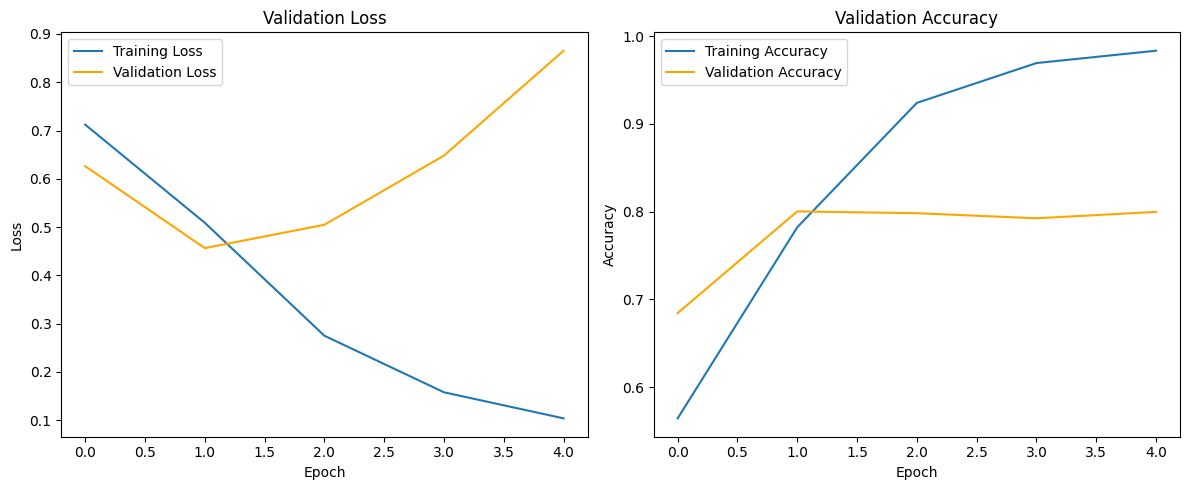

In [150]:
# Create a figure with subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) 

# Plot validation loss 
ax1.plot(history.history['loss'], label='Training Loss') 
ax1.plot(history.history['val_loss'], label='Validation Loss',color='orange') 
ax1.set_title('Validation Loss') 
ax1.set_xlabel('Epoch') 
ax1.set_ylabel('Loss') 
ax1.legend() 

# Plot validation accuracy 
ax2.plot(history.history['accuracy'], label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange') 
ax2.set_title('Validation Accuracy') 
ax2.set_xlabel('Epoch') 
ax2.set_ylabel('Accuracy') 
ax2.legend() 

# Adjust layout 
plt.tight_layout() 

# Show the plots 
plt.show()


In [151]:
#evaluating loss and accuray of the model 
loss, accuracy = model.evaluate(test_padded,testing_labels_final) 
print(f'Accurcy on test dataset :{round(accuracy*100,2)}%')


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7948 - loss: 0.8770
Accurcy on test dataset :79.52%


In [152]:
#predicting the model 

pred_prob = model.predict(test_padded) 
pred_label = [1 if prob >= 0.5 else 0 for prob in pred_prob] 
pred_label[:5]


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[1, 0, 0, 1, 0]

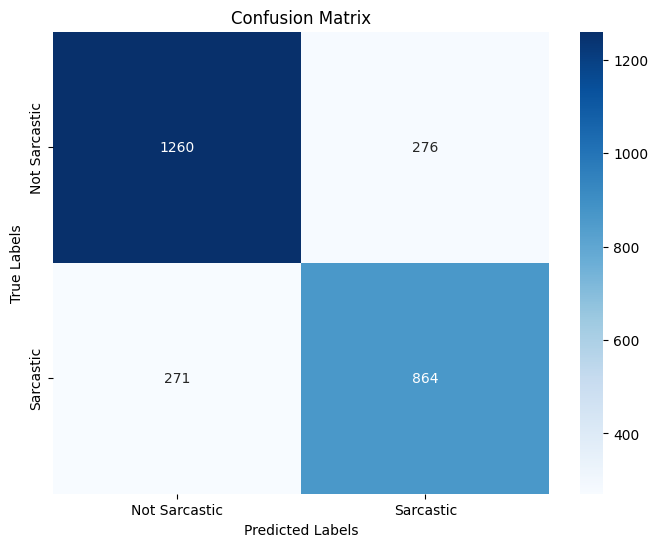

In [153]:
# Compute confusion matrix using the predicted classes and true labels 
conf_matrix = confusion_matrix(testing_labels_final, pred_label) 

# Plot the confusion matrix using a heatmap 
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
			xticklabels=['Not Sarcastic', 'Sarcastic'], 
			yticklabels=['Not Sarcastic', 'Sarcastic']) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix') 
plt.show() 


In [154]:
# Print Classification Report 
print("\nClassification Report:") 
print(classification_report(testing_labels_final, pred_label, target_names=['Not Sarcastic', 'Sarcastic']))



Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.82      0.82      0.82      1536
    Sarcastic       0.76      0.76      0.76      1135

     accuracy                           0.80      2671
    macro avg       0.79      0.79      0.79      2671
 weighted avg       0.80      0.80      0.80      2671



In [156]:
while True: 
	# Prompt the user to input a headline or exit 
	user_input = input("Enter a headline for prediction (or type 'exit' to quit): ") 

	# Check if the user wants to exit 
	if user_input.lower() == 'exit': 
		break

	# Clean and preprocess user input 
	cleaned_input = clean_text(user_input) 
	tokenized_input = tokenizer.texts_to_sequences([cleaned_input]) # Tokenize the cleaned text 
	padded_input = pad_sequences(tokenized_input, maxlen=max_length, padding=padding_type) # Pad the tokenized text 

	# Predict sarcasm 
	prediction = model.predict(padded_input) 

	# Print the prediction result 
	if prediction >= 0.5: 
		print(f"Headline: {user_input}\nPrediction: Sarcastic") 
	else: 
		print(f"Headline: {user_input}\nPrediction: Not Sarcastic") 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Headline: New Study Shows Benefits of Regular Exercise on Mental Health
Prediction: Not Sarcastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Headline: Unbelievable: Report Finds Mondays Still Exist
Prediction: Sarcastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Headline: 
Prediction: Not Sarcastic
